In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn import multioutput
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# 1.

In [2]:
df_train = pd.read_csv('ds-boot-2.csv',sep='	', index_col=0)
df_train.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
id,,,,,,,,,,,,,,,,,,,,,
11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,9.0,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,10.0,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,6.5,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,6.5,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,7.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [3]:
X_train = df_train.values[:,:28]
y_train = df_train.values[:,28:]

In [4]:
est = linear_model.LinearRegression()
clf = ensemble.BaggingRegressor(est, 1000, max_samples=0.7)
clf = multioutput.MultiOutputRegressor(clf)
clf.fit(X_train, y_train)

MultiOutputRegressor(estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.7, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
           n_jobs=1)

In [5]:
print('Average R^2', clf.score(X_train, y_train))

Average R^2 0.906315719882


In [6]:
predicted = clf.predict(X_train)
print('Mean of predicted', np.mean(predicted, axis = 0))
print('Mean of predicted', np.median(predicted, axis = 0))
print('MSE ', [metrics.mean_squared_error(predicted[:,i], y_train[:,i]) for i,_ in enumerate(predicted.T)])

Mean of predicted [ 4.20937447  5.5448831   7.21935626  1.50038083  5.68477451]
Mean of predicted [ 4.44298852  6.20663694  8.23939004  1.7103865   6.48153644]
MSE  [1.4146748892890724, 1.733854790527958, 0.076953733582461922, 0.032438346277501952, 0.47679610192507005]


In [7]:
coef_lower = []
coef_upper = []
bias_lower = []
bias_upper = []
for i, estimator in enumerate(clf.estimators_):
    s = np.array([lr.coef_ for lr in estimator.estimators_])
    coef_lower.append(np.percentile(s, 5, axis = 0))
    coef_upper.append(np.percentile(s, 95, axis = 0))
    b = np.array([lr.intercept_ for lr in estimator.estimators_])
    bias_lower.append(np.percentile(b, 5, axis = 0))
    bias_upper.append(np.percentile(b, 95, axis = 0))

In [8]:
for i in range(len(coef_lower)):
    for j in range(coef_lower[i].shape[0]):
        print ('Predictor for y{}'.format(i), 'coef p{}'.format(j), '(', coef_lower[i][j], ',',coef_upper[i][j], ')')
    print ('Predictor for y{}'.format(i),' bias', '(', coef_lower[i][j], ',',coef_upper[i][j], ')')

Predictor for y0 coef p0 ( -0.118827944182 , 0.567393802207 )
Predictor for y0 coef p1 ( -0.347774139164 , 0.425563980572 )
Predictor for y0 coef p2 ( -0.430203323068 , 0.371498430791 )
Predictor for y0 coef p3 ( -0.0637298592671 , 0.771942751236 )
Predictor for y0 coef p4 ( -0.617125323979 , 0.272946968713 )
Predictor for y0 coef p5 ( -0.262012593691 , 0.554700151923 )
Predictor for y0 coef p6 ( -0.610415721609 , 0.2213010691 )
Predictor for y0 coef p7 ( -0.35500264343 , 0.346863524983 )
Predictor for y0 coef p8 ( -0.337129360188 , 0.401810131029 )
Predictor for y0 coef p9 ( -0.476111549375 , 0.221679003953 )
Predictor for y0 coef p10 ( -0.181448623174 , 0.626964170657 )
Predictor for y0 coef p11 ( -0.26838391012 , 0.431251775585 )
Predictor for y0 coef p12 ( -0.301253124626 , 0.506646078249 )
Predictor for y0 coef p13 ( -0.381387832166 , 0.334666372542 )
Predictor for y0 coef p14 ( -0.657928370771 , 0.0792289379452 )
Predictor for y0 coef p15 ( -0.161350534583 , 0.426350654281 )
Pred

Predictor for y4 coef p19 ( -0.282425459942 , 0.123619120991 )
Predictor for y4 coef p20 ( -0.0729594836357 , 0.330054038528 )
Predictor for y4 coef p21 ( -0.154968900588 , 0.211683649183 )
Predictor for y4 coef p22 ( -0.0645961112438 , 0.244246941271 )
Predictor for y4 coef p23 ( -0.266792590216 , 0.156769234077 )
Predictor for y4 coef p24 ( -0.15463172694 , 0.168031013343 )
Predictor for y4 coef p25 ( -0.116501519443 , 0.245257067958 )
Predictor for y4 coef p26 ( -0.229722115304 , 0.180047910946 )
Predictor for y4 coef p27 ( -0.250361346553 , 0.0650676360754 )
Predictor for y4  bias ( -0.250361346553 , 0.0650676360754 )


# 2.

In [9]:
df = pd.read_csv('ds-boot-1.csv',sep='	', index_col=0)
df.shape

(1327, 2)

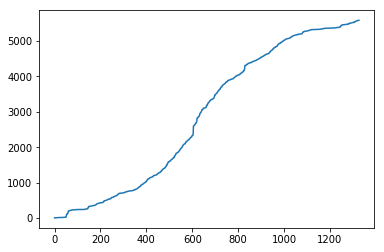

In [10]:
plt.plot(df.cummBugs.values)

In [11]:
from scipy import optimize
from functools import reduce
import itertools
B = 1000
N = df.shape[0]
block_size = 20
n_blocks = int(np.ceil(N / 20))
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k*(x - x0)))

blocks = np.array_split(df.bugsPerDay.values, n_blocks)
coef = np.zeros((B, 3))
for i in range(B):
    bootstrap_indeces = np.sort(np.random.randint(0, n_blocks, n_blocks))
    bootstrap_samples = [blocks[index].tolist() for index in bootstrap_indeces]
    bootstrap_samples = reduce(lambda x,y: x+y,bootstrap_samples)
    bootstrap_samples = list(itertools.accumulate(bootstrap_samples))
    coef[i], _ = optimize.curve_fit(logistic, np.arange(len(bootstrap_samples)), bootstrap_samples)

C:\Users\nprok\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [12]:
mean_coef = np.mean(coef,axis=0)
lb = np.percentile(coef, 5, axis = 0)
ub = np.percentile(coef, 95, axis = 0)
print("Coef L (%f , %f)" % (lb[0] , ub[0]))
print("Coef x0 (%f , %f)" % (lb[1] , ub[1]))
print("Coef k (%f , %f)" % (lb[2] , ub[2]))

Coef L (4684.092601 , 6619.514762)
Coef x0 (551.633992 , 730.490762)
Coef k (0.004981 , 0.007292)


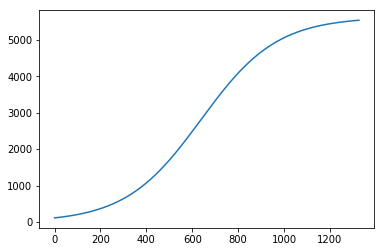

In [13]:
def bootstrap_fn(x):
    return mean_coef[0] / (1 + np.exp(-mean_coef[2]*(x - mean_coef[1])))
    
plt.plot(bootstrap_fn(np.arange(N)))